In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-02-01/breed_traits.csv')

In [2]:
df

,Breed,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Coat Type,Coat Length,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs
0,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
2,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
3,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
4,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Cesky Terriers,4,5,3,2,2,1,Wavy,Medium,4,3,3,4,3,3,3,3
191,American Foxhounds,3,5,5,3,1,1,Smooth,Short,3,3,3,3,3,4,5,3
192,Azawakhs,3,3,3,2,2,1,Smooth,Short,1,3,3,3,2,3,1,3
193,English Foxhounds,5,5,5,3,1,2,Double,Short,4,4,3,4,4,4,5,4


This dataset contains information on different dog breeds. Answer the following questions:

- How many breeds have an energy level of 5? `35`


In [7]:
(df['Energy Level'] == 5).sum()

35

In [4]:
df.columns

Index(['Breed', 'Affectionate With Family', 'Good With Young Children',
       'Good With Other Dogs', 'Shedding Level', 'Coat Grooming Frequency',
       'Drooling Level', 'Coat Type', 'Coat Length', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs'],
      dtype='object')

- How many different coat types are there? `10`

In [8]:
df['Coat Type'].nunique()

10

- What is the average drooling level of breeds with a long coat length? `1.483`

In [9]:
(df[df['Coat Length'] == 'Long'])['Drooling Level'].mean()

1.4827586206896552

In [43]:
df.loc[df['Coat Length'] == 'Long', 'Drooling Level'].mean()

1.4827586206896552

- What is the barking level of Anatolian Shepherd Dogs? `3`

In [42]:
# df[df.Breed == 'Anatolian Shepherd Dogs']
df[df.Breed.str.startswith('Anatolian')]['Barking Level']

84    3
Name: Barking Level, dtype: int64

- How many breeds have a smooth coat type, a short coat length, and a playfulness level of 3? `27`


In [36]:
(df[df['Coat Type'] == 'Smooth'][df['Coat Length'] == 'Short'][df['Playfulness Level'] == 3]).shape[0]

/var/folders/s2/b51sj28n53v8l4709q1p8p4c0000gn/T/ipykernel_21442/1006240433.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df[df['Coat Type'] == 'Smooth'][df['Coat Length'] == 'Short'][df['Playfulness Level'] == 3]).shape[0]


27

- What percentage of breeds fall into each value of adaptability level? Make a visualization like the one below showing this

In [47]:
shedding_level = df['Shedding Level'].value_counts().sort_index()
shedding_level

0      1
1     27
2     41
3    109
4     16
5      1
Name: Shedding Level, dtype: int64

In [46]:
shedding_level/shedding_level.sum()

0    0.005128
1    0.138462
2    0.210256
3    0.558974
4    0.082051
5    0.005128
Name: Shedding Level, dtype: float64

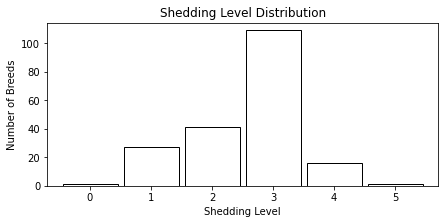

In [53]:
import matplotlib.pyplot as plt

shedding_level.plot.bar(
    width=.9,
    ec='black',
    fc='white',
    figsize=(7, 3),
    title= 'Shedding Level Distribution',
    ylabel= 'Number of Breeds',
    xlabel= 'Shedding Level'
)
plt.xticks(rotation=0)
plt.show()

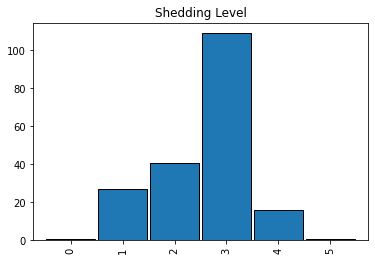